1. Importing Required Libraries:

We start by importing the essential Python libraries for image processing, model building, training, and evaluation. These libraries include TensorFlow/Keras for deep learning, NumPy for numerical operations, Matplotlib for plotting, and scikit-learn for evaluation metrics.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2. Setting Up Dataset Paths and Parameters:

We specify the paths to our dataset folders and set the image size and batch size. The dataset is organized into training, validation, and test folders. Each of these contains three subfolders: Normal, Tuberculosis, and Pneumonia.

In [3]:
train_dir = "dataset/train"
val_dir   = "dataset/val"
test_dir  = "dataset/test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

3. Creating Image Data Generators:

We use ImageDataGenerator to preprocess the images. For training data, we apply augmentation techniques such as rotation and zoom to improve generalization. For validation and test data, we only rescale pixel values.

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

 4. Loading the Datases:

 We load the images from the folders with the data generators. We resize the images to 224x224 and group them by class labels. We set shuffle=False for the test set to ensure consistent evaluation.

In [6]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 8224 images belonging to 3 classes.
Found 3024 images belonging to 3 classes.
Found 3632 images belonging to 3 classes.


5. Building the CNN Model:[IMPORTANT AND CRUTIAL STEP]

We build a Convolutional Neural Network (CNN) using Keras. The model consists of three convolutional layers that 
extract features. 
These are followed by dense layers for classification.
The final layer uses softmax activation to provide probabilities for three classes.

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Normal, TB, Pneumonia
])

C:\Users\jsabi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6. Compiling the ModeL:[HELPS IN MODEL TRAINING AND OUTPUT]

We build the model with the Adam optimizer and categorical cross-entropy loss. This setup works well for multi-class classification. We also monitor accuracy as a performance metric.

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

7. Training the ModeL:

We train the model with the training data and check it using the validation set. We train for 10 epochs to see how learning progresses.

In [10]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 216s 839ms/step - accuracy: 0.8586 - loss: 0.3511 - val_accuracy: 0.9322 - val_loss: 0.1661
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 182s 710ms/step - accuracy: 0.8936 - loss: 0.2845 - val_accuracy: 0.9841 - val_loss: 0.0706
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 182s 710ms/step - accuracy: 0.9042 - loss: 0.2458 - val_accuracy: 0.9778 - val_loss: 0.0770
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 163s 633ms/step - accuracy: 0.9245 - loss: 0.2101 - val_accuracy: 0.9818 - val_loss: 0.0705
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 171s 665ms/step - accuracy: 0.9256 - loss: 0.2053 - val_accuracy: 0.9828 - val_loss: 0.0601
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 160s 621ms/step - accuracy: 0.9345 - loss: 0.1847 - val_accuracy: 0.9894 - val_loss: 0.0336
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 166s 644ms/step - accuracy: 0.9392 - loss: 0.1652 - val_accuracy: 0.9858 - val_loss: 0.0425
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 157s 610ms/step - accuracy: 0.9429 -

8. Evaluating the Model  
  
We check the model on the validation set to see how well it performs. We also make predictions on the test set and compare these predictions with the actual labels using a confusion matrix and a classification report.

In [ ]:
    val_loss, val_acc = model.evaluate(val_gen)
    print(f"Validation Accuracy: {val_acc:.2f}")

    predictions = model.predict(test_gen)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_gen.classes

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9924 - loss: 0.0242
Validation Accuracy: 0.99
114/114 ━━━━━━━━━━━━━━━━━━━━ 37s 319ms/step
Confusion Matrix:
[[ 676   61   11]
 [  18  371    1]
 [   9    6 2479]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.96      0.90      0.93       748
   pneumonia       0.85      0.95      0.90       390
tubercluosis       1.00      0.99      0.99      2494

    accuracy                           0.97      3632
   macro avg       0.93      0.95      0.94      3632
weighted avg       0.97      0.97      0.97      3632



9. Visualizing Training Accuracy

We plot the training and validation accuracy over epochs to show how well the model is learning

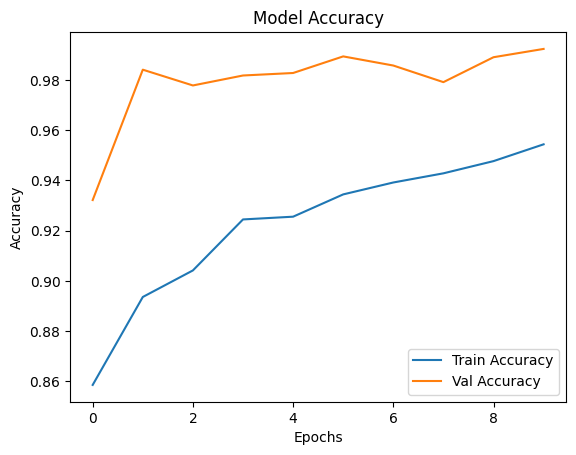

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()